### Convert datasets to a common CRS so we can run some spatial operations

In [1]:
%matplotlib inline

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [2]:
# import all the datasets we have explored thus far

#us states and provinces
us_states = gpd.read_file ("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson")

# national park units for entire US
us_nps = gpd.read_file ("./data/NPS_-_Land_Resources_Division_Boundary_and_Tract_Data_Service.shp")

# national monuments and conservation areas in Utah
ut_nms = gpd.read_file ("./data/BLMMonumentsAndNCAs.shp")

sw_birds = gpd.read_file("./data/sw_birds.geojson")

In [3]:
# check crs of states
us_states.crs

{'init': 'epsg:4326'}

In [4]:
# check crs of parks
us_nps.crs

{'init': 'epsg:3857'}

In [5]:
# check crs of monuments
ut_nms.crs

{'init': 'epsg:26912'}

In [6]:
# check crs of birds
sw_birds.crs

{'init': 'epsg:4326'}

In [7]:
# project all GeoDataFrames to USA Contiguous Equidistant Conic for spatial analysis

# set a variable with parameters
project_params  = '+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'

# reproject and assign to new variables
states_prj = us_states.to_crs(project_params)
nps_prj = us_nps.to_crs(project_params)
nms_prj = ut_nms.to_crs(project_params)
birds_prj = sw_birds.to_crs(project_params)

<AxesSubplot:>

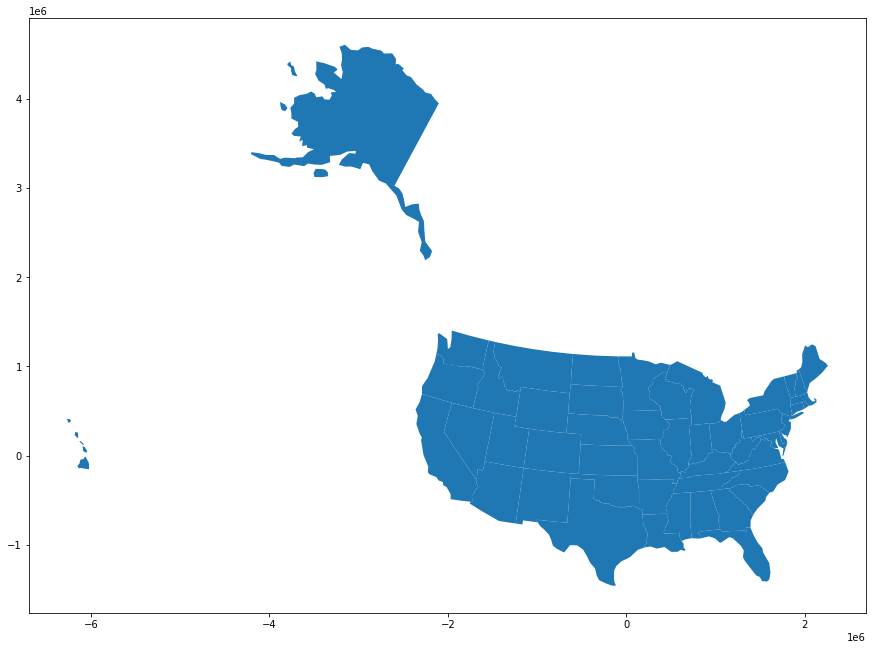

In [8]:
# plot states
states_prj.plot(figsize=(15,15))

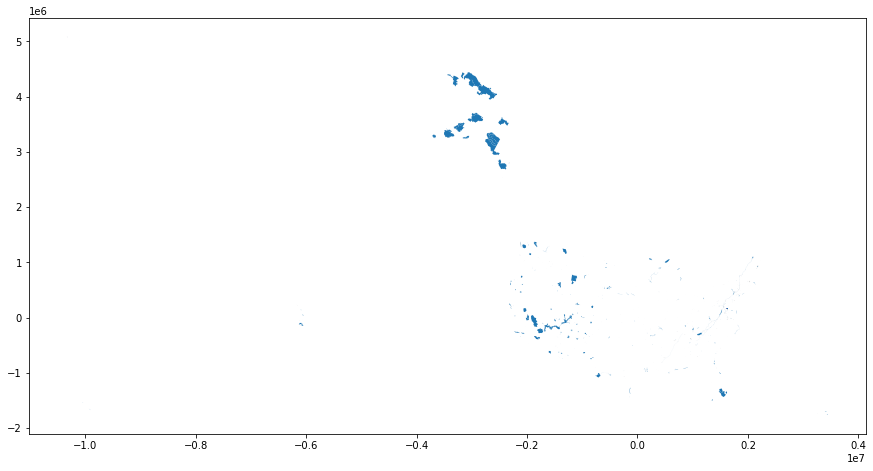

In [9]:
# plot national parks
nps_prj.plot(figsize=(15,15));

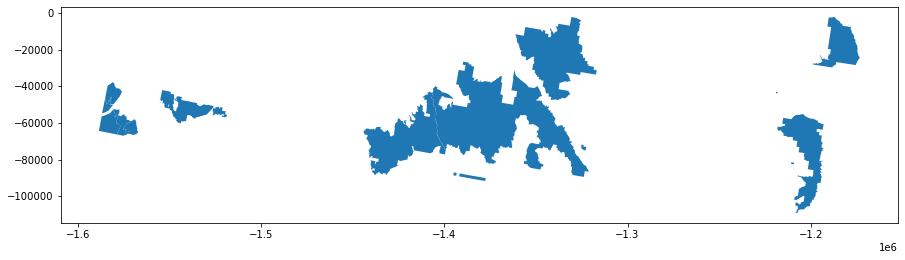

In [10]:
# plot national monuments
nms_prj.plot(figsize=(15,15));

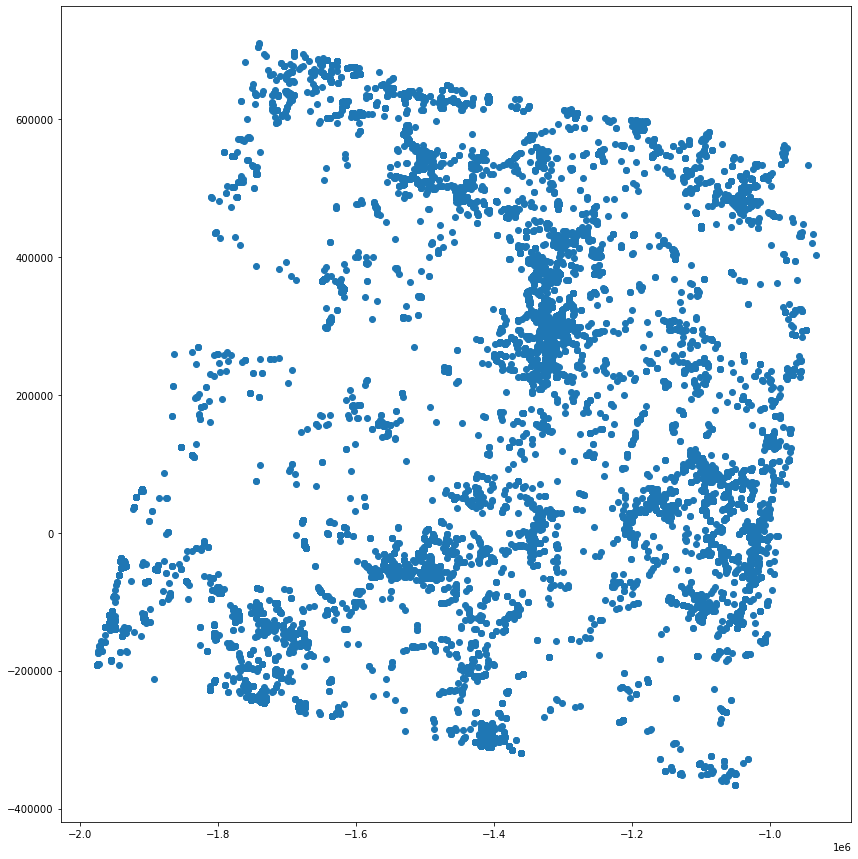

In [11]:
birds_prj.plot(figsize=(15,15));

In [12]:
# export all the data as reprojected geojsons and nps tp shapefile because of size constraints
birds_prj.to_file("./data/sw_birds_prj.geojson", driver='GeoJSON')
states_prj.to_file("./data/states_prj.geojson", driver='GeoJSON')
nps_prj.to_file("./data/nps_prj.shp")
nms_prj.to_file("./data/nms_prj.geojson", driver='GeoJSON')